In [1]:
from IPython.display import display
import os

# 上傳檔案（會跳出檔案選擇器）
from ipywidgets import FileUpload

upload = FileUpload()
display(upload)

FileUpload(value=(), description='Upload')

In [2]:
import os
from pathlib import Path

# 假設你只上傳了一個檔案
fileinfo = upload.value[0]  # 通常是一個 dict，含 'name' 和 'content'

# 顯示內容結構（除錯用）
print(fileinfo)

# 儲存 kaggle.json
filename = fileinfo['name']
content = fileinfo['content']

kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(exist_ok=True)

kaggle_json_path = kaggle_dir / "kaggle.json"
with open(kaggle_json_path, "wb") as f:
    f.write(content)

# 設定權限（Linux/macOS 建議）
os.chmod(kaggle_json_path, 0o600)

print(f"{filename} 已成功儲存至 {kaggle_json_path}")

{'name': 'kaggle (1).json', 'type': 'application/json', 'size': 69, 'content': <memory at 0x75b456de6d00>, 'last_modified': datetime.datetime(2025, 5, 30, 12, 49, 35, 526000, tzinfo=datetime.timezone.utc)}
kaggle (1).json 已成功儲存至 /home/jovyan/.kaggle/kaggle.json


In [3]:
import os
import zipfile
import pandas as pd

labels = pd.read_csv('dog-breed-identification/labels.csv')

In [5]:
import os
import shutil

def convert_stanford_images(stanford_dir, output_dir):
    if not os.path.exists(stanford_dir):
        raise FileNotFoundError(f"Stanford 目錄不存在：{stanford_dir}")
    
    added_count = 0
    matched_breeds = 0
    for folder in os.listdir(stanford_dir):
        folder_path = os.path.join(stanford_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        # 解析品種名稱：n02085782-Japanese_spaniel → japanese_spaniel
        if "-" in folder:
            breed = folder.split("-", 1)[1].lower().replace(" ", "_")
            target_dir = os.path.join(output_dir, breed)

            if os.path.exists(target_dir):
                os.makedirs(target_dir, exist_ok=True)
                matched_breeds += 1
                for img_file in os.listdir(folder_path):
                    if img_file.lower().endswith(".jpg"):
                        src = os.path.join(folder_path, img_file)
                        dst = os.path.join(target_dir, f"stanford_{img_file}")
                        shutil.copyfile(src, dst)
                        added_count += 1

    print(f"✔️ 已合併 Stanford Dogs 圖片：{added_count} 張，匹配品種數：{matched_breeds}")

# 執行整合
convert_stanford_images("Images", "dog_images/train")


✔️ 已合併 Stanford Dogs 圖片：20580 張，匹配品種數：120


In [6]:
kaggle_breeds = set(os.listdir("dog_images/train"))
stanford_folders = os.listdir("Images")

matched = []
unmatched = []

for folder in stanford_folders:
    if "-" in folder:
        breed = folder.split("-")[1].lower().replace(" ", "_")
        if breed in kaggle_breeds:
            matched.append(breed)
        else:
            unmatched.append(breed)

print("✅ Matched:", matched)
print("❌ Unmatched:", unmatched)


✅ Matched: ['affenpinscher', 'shetland_sheepdog', 'tibetan_mastiff', 'australian_terrier', 'kerry_blue_terrier', 'kuvasz', 'golden_retriever', 'newfoundland', 'gordon_setter', 'boxer', 'bluetick', 'standard_schnauzer', 'cairn', 'bedlington_terrier', 'english_setter', 'dandie_dinmont', 'beagle', 'norfolk_terrier', 'leonberg', 'vizsla', 'great_pyrenees', 'chesapeake_bay_retriever', 'malinois', 'dhole', 'weimaraner', 'french_bulldog', 'cardigan', 'sealyham_terrier', 'bloodhound', 'miniature_schnauzer', 'japanese_spaniel', 'airedale', 'brittany_spaniel', 'sussex_spaniel', 'scottish_deerhound', 'entlebucher', 'komondor', 'cocker_spaniel', 'collie', 'bull_mastiff', 'chihuahua', 'rhodesian_ridgeback', 'maltese_dog', 'siberian_husky', 'miniature_pinscher', 'otterhound', 'ibizan_hound', 'briard', 'lakeland_terrier', 'bernese_mountain_dog', 'chow', 'standard_poodle', 'border_terrier', 'greater_swiss_mountain_dog', 'brabancon_griffon', 'norwich_terrier', 'mexican_hairless', 'yorkshire_terrier', '

In [7]:
import os
import shutil
import pandas as pd
from PIL import Image
from tqdm import tqdm
# 讀取標籤
labels = pd.read_csv('dog-breed-identification/labels.csv')
# 建立目標輸出資料夾
output_dir = "dog_images"
train_dir = os.path.join(output_dir, "train")
os.makedirs(train_dir, exist_ok=True)

# 根據標籤將圖片存入對應資料夾
def organize_train_images(labels): # Pass labels as an argument
    src_img_dir = "dog-breed-identification/train"
    for idx, row in tqdm(labels.iterrows(), total=len(labels)):
        img_id = row['id']
        breed = row['breed']
        src_path = os.path.join(src_img_dir, img_id + ".jpg")

        # 建立品種對應資料夾
        breed_dir = os.path.join(train_dir, breed)
        os.makedirs(breed_dir, exist_ok=True)

        dst_path = os.path.join(breed_dir, img_id + ".jpg")
        shutil.copyfile(src_path, dst_path)

# Load labels outside the function
labels = pd.read_csv('dog-breed-identification/labels.csv')
organize_train_images(labels) # Call the function with labels argument

100%|██████████| 10222/10222 [00:44<00:00, 230.14it/s]


In [8]:
# 你的抓取標籤（示範）
labels = [
    'bloodhound', 'doberman', 'african_hunting_dog', 'japanese_spaniel', 'keeshond',
    'shetland_sheepdog', 'brittany_spaniel', 'weimaraner', 'welsh_springer_spaniel', 'lhasa',
    'kuvasz', 'dingo', 'pembroke', 'greater_swiss_mountain_dog', 'giant_schnauzer',
    'bernese_mountain_dog', 'clumber', 'lakeland_terrier', 'kerry_blue_terrier', 'afghan_hound',
    'pug', 'australian_terrier', 'saint_bernard', 'pekinese', 'whippet',
    'scotch_terrier', 'standard_schnauzer', 'bedlington_terrier', 'vizsla', 'mexican_hairless',
    'redbone', 'beagle', 'irish_wolfhound', 'basenji', 'groenendael',
    'irish_setter', 'chesapeake_bay_retriever', 'gordon_setter', 'collie', 'appenzeller',
    'affenpinscher', 'walker_hound', 'papillon', 'american_staffordshire_terrier', 'golden_retriever',
    'boston_bull', 'malamute', 'otterhound', 'staffordshire_bullterrier', 'german_shepherd',
    'scottish_deerhound', 'irish_water_spaniel', 'miniature_pinscher', 'tibetan_terrier', 'yorkshire_terrier',
    'toy_terrier', 'brabancon_griffon', 'sealyham_terrier', 'briard', 'newfoundland',
    'entlebucher', 'great_pyrenees', 'malinois', 'boxer', 'cairn',
    'pomeranian', 'dandie_dinmont', 'english_setter', 'cardigan', 'norfolk_terrier',
    'leonberg', 'maltese_dog', 'eskimo_dog', 'french_bulldog', 'rottweiler',
    'samoyed', 'toy_poodle', 'dhole', 'tibetan_mastiff', 'bluetick',
    'chow', 'chihuahua', 'bull_mastiff', 'rhodesian_ridgeback', 'border_terrier',
    'standard_poodle', 'labrador_retriever', 'norwegian_elkhound', 'english_springer', 'norwich_terrier',
    'silky_terrier', 'miniature_schnauzer', 'old_english_sheepdog', 'italian_greyhound', 'great_dane',
    'miniature_poodle', 'west_highland_white_terrier', 'kelpie', 'komondor', 'schipperke',
    'blenheim_spaniel', 'sussex_spaniel', 'basset', 'bouvier_des_flandres', 'borzoi',
    'siberian_husky', 'border_collie', 'airedale', 'ibizan_hound', 'saluki',
    'english_foxhound', 'irish_terrier', 'cocker_spaniel',
    # 以下不是品種，留著供篩選用
    'soft', 'curly', 'wire', 'black', 'shih', 'flat', 'german_short'
]

# 官方 Stanford Dogs 品種列表 (示範，完整約120品種，這裡你可自行補充)
official_breeds = [
    "affenpinscher", "afghan_hound", "african_hunting_dog", "airedale", "american_staffordshire_terrier",
    "appenzeller", "australian_terrier", "basenji", "basset", "beagle",
    "bedlington_terrier", "bernese_mountain_dog", "black-and-tan_coonhound", "blenheim_spaniel",
    "bloodhound", "border_collie", "border_terrier", "borzoi", "boston_bull",
    "bouvier_des_flandres", "boxer", "brabancon_griffon", "briard", "brittany_spaniel",
    "bull_mastiff", "cairn", "cardigan", "chesapeake_bay_retriever", "chihuahua",
    "chow", "clumber", "cocker_spaniel", "collie", "curly-coated_retriever",
    "dandie_dinmont", "dhole", "dingo", "doberman", "english_foxhound",
    "english_setter", "english_springer", "entlebucher", "eskimo_dog", "flat-coated_retriever",
    "french_bulldog", "german_shepherd", "gordon_setter", "great_dane", "great_pyrenees",
    "groenendael", "ibizan_hound", "irish_setter", "irish_terrier", "irish_wolfhound",
    "italian_greyhound", "japanese_spaniel", "keeshond", "kelpie", "kerry_blue_terrier",
    "komondor", "kuvasz", "labrador_retriever", "lakeland_terrier", "leonberg",
    "lhasa", "malamute", "malinois", "maltese_dog", "mexican_hairless",
    "miniature_poodle", "miniature_schnauzer", "newfoundland", "norfolk_terrier",
    "norwegian_elkhound", "norwich_terrier", "old_english_sheepdog", "otterhound",
    "papillon", "pekinese", "pembroke", "pomeranian", "pug",
    "redbone", "rhodesian_ridgeback", "rottweiler", "saint_bernard", "saluki",
    "samoyed", "schipperke", "scotch_terrier", "scottish_deerhound", "sealyham_terrier",
    "shetland_sheepdog", "shih-tzu", "siberian_husky", "silky_terrier", "soft-coated_wheaten_terrier",
    "staffordshire_bullterrier", "standard_poodle", "standard_schnauzer", "sussex_spaniel",
    "tibetan_mastiff", "tibetan_terrier", "toy_poodle", "toy_terrier", "vizsla",
    "walker_hound", "weimaraner", "welsh_springer_spaniel", "west_highland_white_terrier",
    "whippet", "wire-haired_fox_terrier", "yorkshire_terrier"
]

# 篩選只留下官方品種
matched_breeds = [label for label in labels if label in official_breeds]

print("✅ Matched breeds:")
for breed in matched_breeds:
    print("-", breed)


✅ Matched breeds:
- bloodhound
- doberman
- african_hunting_dog
- japanese_spaniel
- keeshond
- shetland_sheepdog
- brittany_spaniel
- weimaraner
- welsh_springer_spaniel
- lhasa
- kuvasz
- dingo
- pembroke
- bernese_mountain_dog
- clumber
- lakeland_terrier
- kerry_blue_terrier
- afghan_hound
- pug
- australian_terrier
- saint_bernard
- pekinese
- whippet
- scotch_terrier
- standard_schnauzer
- bedlington_terrier
- vizsla
- mexican_hairless
- redbone
- beagle
- irish_wolfhound
- basenji
- groenendael
- irish_setter
- chesapeake_bay_retriever
- gordon_setter
- collie
- appenzeller
- affenpinscher
- walker_hound
- papillon
- american_staffordshire_terrier
- boston_bull
- malamute
- otterhound
- staffordshire_bullterrier
- german_shepherd
- scottish_deerhound
- tibetan_terrier
- yorkshire_terrier
- toy_terrier
- brabancon_griffon
- sealyham_terrier
- briard
- newfoundland
- entlebucher
- great_pyrenees
- malinois
- boxer
- cairn
- pomeranian
- dandie_dinmont
- english_setter
- cardigan
-

In [9]:
import os
import shutil
import pandas as pd
from PIL import Image
from tqdm import tqdm
# 讀取標籤
labels = pd.read_csv('dog-breed-identification/labels.csv')
# 建立目標輸出資料夾
output_dir = "dog_images"
train_dir = os.path.join(output_dir, "train")
os.makedirs(train_dir, exist_ok=True)

def organize_kaggle_images(labels_csv, kaggle_img_dir, output_dir):
    labels = pd.read_csv(labels_csv)
    os.makedirs(output_dir, exist_ok=True)

    for idx, row in tqdm(labels.iterrows(), total=len(labels)):
        img_id = row['id']
        breed = row['breed']
        src_path = os.path.join(kaggle_img_dir, img_id + ".jpg")
        breed_dir = os.path.join(output_dir, breed)
        os.makedirs(breed_dir, exist_ok=True)
        dst_path = os.path.join(breed_dir, img_id + ".jpg")
        if os.path.exists(src_path) and not os.path.exists(dst_path):
            shutil.copyfile(src_path, dst_path)
def organize_stanford_images(stanford_dir, output_dir, kaggle_breeds_set):
    for folder in os.listdir(stanford_dir):
        folder_path = os.path.join(stanford_dir, folder)
        if "-" in folder:
            breed = folder.split("-")[1].lower()  # 取第二段並小寫
            breed = breed.replace(" ", "_")

            # 只複製有在 Kaggle 資料集裡的品種，避免新增不相關品種
            if breed in kaggle_breeds_set:
                breed_dir = os.path.join(output_dir, breed)
                os.makedirs(breed_dir, exist_ok=True)

                for img_file in os.listdir(folder_path):
                    src = os.path.join(folder_path, img_file)
                    dst = os.path.join(breed_dir, f"stanford_{img_file}")
                    if not os.path.exists(dst):
                        shutil.copyfile(src, dst)
kaggle_labels_csv = "dog-breed-identification/labels.csv"
kaggle_img_dir = "dog-breed-identification/train"
output_dir = "dog_images/train"

# 讀取 Kaggle 品種名稱集合
kaggle_labels = pd.read_csv(kaggle_labels_csv)
kaggle_breeds_set = set(kaggle_labels['breed'].unique())

# 整理 Kaggle 圖片
organize_kaggle_images(kaggle_labels_csv, kaggle_img_dir, output_dir)

# 整理 Stanford Dogs 圖片，前提是你已經解壓 Stanford Dogs 到 Images/ 資料夾
stanford_dir = "Images"
organize_stanford_images(stanford_dir, output_dir, kaggle_breeds_set)


100%|██████████| 10222/10222 [00:01<00:00, 6009.83it/s]


In [10]:
import os
from torch.utils.data import Dataset, ConcatDataset, random_split, DataLoader, WeightedRandomSampler
from PIL import Image
from collections import Counter
import torch
from torchvision import transforms
root_dir = "dog_images/train"

# 建立 class_to_idx
class_names = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

# 自訂 Dataset，接受 class_to_idx 參數
class DogBreedImageFolder(Dataset):
    def __init__(self, root_dir, class_to_idx, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_to_idx = class_to_idx

        for class_name in class_to_idx.keys():
            class_folder = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_folder):
                continue
            for filename in os.listdir(class_folder):
                if filename.endswith(('.jpg', '.png')):
                    self.image_paths.append(os.path.join(class_folder, filename))
                    self.labels.append(class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


In [11]:
# 定義 Transform
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, ColorJitter, RandomRotation, ToTensor, Normalize

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),  # 使用 ImageNet 的 mean/std
                         (0.229, 0.224, 0.225)),
])


test_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [12]:
# 建立 Dataset 與切分
from torch.utils.data import random_split, DataLoader, WeightedRandomSampler
import collections
from collections import Counter

# 讀取分類後資料
dataset = DogBreedImageFolder(root_dir=root_dir, class_to_idx=class_to_idx, transform=train_transform)

# 計算資料數量與切分比例
val_ratio = 0.2
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 取得 training set 的原始 indices
train_indices = train_dataset.indices  # 是 dataset 中對應的索引
train_labels = [dataset.labels[i] for i in train_indices]

# 計算類別樣本數與每個 sample 權重
label_counts = Counter(train_labels)
class_sample_counts = [label_counts[i] for i in range(len(label_counts))]
sample_weights = [1.0 / class_sample_counts[label] for label in train_labels]

# 建立 WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# 建立 DataLoader（train 用 sampler, val 用 shuffle=False）
train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# 顯示類別分布（驗證分布仍可看是否合理）
val_labels = [dataset.labels[i] for i in val_dataset.indices]
print("Train label distribution:", Counter(train_labels))
print("Val label distribution:", Counter(val_labels))
#這是調平衡的

Train label distribution: Counter({73: 297, 97: 289, 1: 284, 94: 270, 87: 267, 11: 265, 26: 264, 7: 262, 100: 262, 109: 257, 69: 256, 52: 255, 59: 251, 42: 250, 88: 249, 98: 243, 80: 240, 84: 237, 6: 235, 13: 235, 101: 234, 78: 234, 68: 234, 30: 233, 75: 233, 93: 232, 55: 230, 3: 229, 9: 229, 86: 228, 117: 227, 102: 222, 70: 222, 10: 221, 61: 216, 19: 214, 15: 212, 14: 210, 111: 210, 8: 210, 60: 210, 92: 209, 35: 208, 39: 205, 17: 205, 2: 203, 28: 203, 116: 202, 57: 202, 67: 202, 71: 201, 64: 200, 79: 200, 81: 200, 90: 200, 119: 199, 40: 199, 105: 199, 33: 198, 96: 197, 118: 197, 53: 197, 62: 195, 54: 195, 4: 194, 82: 193, 74: 193, 77: 193, 56: 192, 32: 192, 66: 192, 37: 191, 27: 191, 12: 191, 95: 189, 76: 188, 24: 187, 114: 186, 106: 185, 46: 185, 107: 185, 21: 185, 5: 184, 25: 184, 110: 184, 103: 183, 45: 182, 47: 182, 41: 182, 99: 182, 36: 181, 16: 181, 18: 181, 31: 181, 20: 181, 51: 180, 85: 180, 65: 179, 0: 179, 72: 179, 115: 179, 44: 179, 34: 179, 50: 178, 38: 178, 63: 178, 83: 1

In [13]:
from torchvision import transforms
from PIL import Image

def collate_with_resize(batch, image_size):
    images, labels = zip(*batch)
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),  # 直接縮放 tensor
    ])
    images = [transform(img) if isinstance(img, torch.Tensor) else transform(transforms.ToTensor()(img)) for img in images]
    return torch.stack(images), torch.tensor(labels)


In [14]:
# ✅ 動態圖像大小
image_size = 320  # or 320
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,
                          collate_fn=lambda batch: collate_with_resize(batch, image_size))

# 測試一個 batch
for images, labels in train_loader:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    break


Images shape: torch.Size([16, 3, 320, 320])
Labels shape: torch.Size([16])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


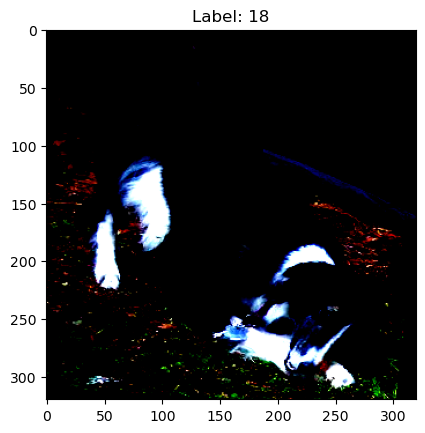

In [15]:
# 如果需要視覺化一個 batch
import matplotlib.pyplot as plt
def show_batch(loader):
    images, labels = next(iter(loader))
    img = images[0].permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(f"Label: {labels[0]}")
    plt.show()

show_batch(train_loader)

In [16]:
import torch
import torch.nn as nn
import torchvision.models as models

num_classes = 120  # Dog Breed Identification 有 120 類別
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 載入預訓練模型並修改最後一層
model = models.resnext101_32x8d(weights=models.ResNeXt101_32X8D_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False

num_classes = len(dataset.class_to_idx)

model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, num_classes)
)

# 搬移到裝置（GPU 或 CPU）
model = model.to(device)

In [17]:
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing

    def forward(self, logits, target):
        log_probs = nn.functional.log_softmax(logits, dim=-1)
        nll_loss = -log_probs.gather(dim=-1, index=target.unsqueeze(1)).squeeze(1)
        smooth_loss = -log_probs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()


In [18]:
from torch.optim.lr_scheduler import _LRScheduler

class GradualWarmupScheduler(_LRScheduler):
    def __init__(self, optimizer, multiplier, total_epoch, after_scheduler=None, last_epoch=-1):
        self.multiplier = multiplier
        if self.multiplier <= 1.:
            raise ValueError('multiplier should be greater than 1.')
        self.total_epoch = total_epoch
        self.after_scheduler = after_scheduler
        self.finished = False
        super(GradualWarmupScheduler, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        if self.last_epoch >= self.total_epoch:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]

        return [
            base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.)
            for base_lr in self.base_lrs
        ]

    def step(self, epoch=None):
        if self.finished and self.after_scheduler:
            if epoch is None:
                self.after_scheduler.step(None)
            else:
                self.after_scheduler.step(epoch - self.total_epoch)
        else:
            return super(GradualWarmupScheduler, self).step(epoch)


In [19]:
from collections import Counter
from torchvision import transforms
from torch.optim.lr_scheduler import CosineAnnealingLR

num_epochs = 50
warmup_epochs = 5
# 計算各類別的樣本數
label_counts = Counter(dataset.labels)
num_classes = len(label_counts)
class_counts = [label_counts[i] for i in range(num_classes)]

# 計算每個類別的權重：樣本數越少，權重越高
weights = [1.0 / c for c in class_counts]
weights = torch.tensor(weights, dtype=torch.float).to(device)

# 使用 class weights + label smoothing
criterion = LabelSmoothingCrossEntropy(smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

cosine_scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs - warmup_epochs)
scheduler = GradualWarmupScheduler(
    optimizer,
    multiplier=5.0,               # 最終學習率 = 初始 * 1.0
    total_epoch=warmup_epochs,
    after_scheduler=cosine_scheduler
)


In [20]:
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

def get_dataloaders(image_size, batch_size):
    transform_train = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
    transform_val = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
    ])

    train_dataset = ImageFolder(train_dir, transform=transform_train)
    val_dataset = ImageFolder(val_dir, transform=transform_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    return train_loader, val_loader


In [21]:
class EarlyStopping:
    def __init__(self, patience=8, verbose=False, delta=0, path='best_model.pth'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''儲存目前最佳模型'''
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} → {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [22]:
small_image_epochs = 5
small_size = 224
large_size = 320
batch_size = 64

early_stopping = EarlyStopping(patience=8, verbose=True, path='best_ResNeXt101.pth')

full_dataset = DogBreedImageFolder("dog_images/train", class_to_idx, transform=train_transform)

for epoch in range(num_epochs):
    image_size = small_size if epoch < small_image_epochs else large_size

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                              collate_fn=lambda batch: collate_with_resize(batch, image_size))
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                            collate_fn=lambda batch: collate_with_resize(batch, image_size))

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Size: {image_size}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    early_stopping(val_loss, model)

    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# 載入最佳模型
model.load_state_dict(torch.load("best_ResNeXt101.pth"))


Epoch 1/50, Size: 224, Loss: 2.8368, Accuracy: 53.86%
Validation Loss: 1.3613, Validation Accuracy: 89.37%
Validation loss decreased (inf → 1.361312). Saving model...
Epoch 2/50, Size: 224, Loss: 1.3526, Accuracy: 86.16%
Validation Loss: 1.1142, Validation Accuracy: 92.31%
Validation loss decreased (1.361312 → 1.114152). Saving model...
Epoch 3/50, Size: 224, Loss: 1.2130, Accuracy: 90.34%
Validation Loss: 1.0663, Validation Accuracy: 93.23%
Validation loss decreased (1.114152 → 1.066275). Saving model...
Epoch 4/50, Size: 224, Loss: 1.1667, Accuracy: 91.75%
Validation Loss: 1.0587, Validation Accuracy: 93.65%
Validation loss decreased (1.066275 → 1.058702). Saving model...


/opt/conda/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:807: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch 5/50, Size: 224, Loss: 1.1498, Accuracy: 92.55%
Validation Loss: 1.0605, Validation Accuracy: 93.41%
EarlyStopping counter: 1 out of 8
Epoch 6/50, Size: 320, Loss: 1.1435, Accuracy: 93.35%
Validation Loss: 1.0446, Validation Accuracy: 94.71%
Validation loss decreased (1.058702 → 1.044575). Saving model...
Epoch 7/50, Size: 320, Loss: 1.1005, Accuracy: 94.61%
Validation Loss: 1.0427, Validation Accuracy: 94.66%
Validation loss decreased (1.044575 → 1.042652). Saving model...
Epoch 8/50, Size: 320, Loss: 1.0900, Accuracy: 95.23%
Validation Loss: 1.0452, Validation Accuracy: 94.48%
EarlyStopping counter: 1 out of 8
Epoch 9/50, Size: 320, Loss: 1.0741, Accuracy: 95.82%
Validation Loss: 1.0238, Validation Accuracy: 94.82%
Validation loss decreased (1.042652 → 1.023772). Saving model...
Epoch 10/50, Size: 320, Loss: 1.0623, Accuracy: 96.04%
Validation Loss: 1.0117, Validation Accuracy: 95.55%
Validation loss decreased (1.023772 → 1.011665). Saving model...
Epoch 11/50, Size: 320, Loss:

<All keys matched successfully>

In [23]:
# 保存訓練後的模型
torch.save(model.state_dict(), "dog_breed_model.pth")


In [24]:
# 測試集的評估
test_accuracy = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        test_accuracy += (predicted == labels).sum().item()

test_accuracy = 100 * test_accuracy / len(val_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}%")

import os

Test Accuracy: 96.66%


In [25]:
# 測試集的評估
tta_transforms = [
    transforms.Compose([transforms.Resize((320, 320)), transforms.ToTensor()]),
    transforms.Compose([transforms.Resize((320, 320)), transforms.RandomHorizontalFlip(p=1.0), transforms.ToTensor()]),
    transforms.Compose([transforms.Resize((320, 320)), transforms.ColorJitter(brightness=0.2), transforms.ToTensor()])
]

model.eval()
total = 0
correct = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        tta_preds = []
        for tform in tta_transforms:
            aug_images = torch.stack([tform(transforms.ToPILImage()(img.cpu())) for img in images])
            aug_images = aug_images.to(device)
            outputs = model(aug_images)
            tta_preds.append(torch.softmax(outputs, dim=1))

        avg_preds = torch.mean(torch.stack(tta_preds), dim=0)
        _, predicted = torch.max(avg_preds, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"TTA Test Accuracy: {accuracy:.2f}%")


TTA Test Accuracy: 8.33%


In [26]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class TestImageDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_filenames = sorted(os.listdir(image_folder))
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = self.image_filenames[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name.split('.')[0]  # 傳回 image tensor 和 id（

In [27]:
# 取得所有類別名稱，需排序以符合 submission 格式
all_breeds = sorted(dataset.class_to_idx.keys())

# 建立 mapping
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
# 修正 Test transform 使用與訓練相同的 ImageNet 格式
test_transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),  # 與訓練相同
                         (0.229, 0.224, 0.225))
])


# 設定測試資料夾路徑
test_folder = 'dog-breed-identification/test'  # 請確認實際位置

# 建立 DataLoader
test_dataset = TestImageDataset(test_folder, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 建立 DataFrame 儲存預測結果
results = []

In [28]:
# 使用 softmax 輸出機率
results = []

with torch.no_grad():
    for inputs, image_ids in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()  # shape: (batch_size, 120)

        for img_id, prob_vector in zip(image_ids, probs):
            row = {"id": img_id}
            for breed, prob in zip(all_breeds, prob_vector):
                row[breed] = prob
            results.append(row)

# 轉成 DataFrame 並輸出
df = pd.DataFrame(results)
df = df[["id"] + all_breeds]  # 確保順序符合要求
df.to_csv("submission1.9.csv", index=False)
print("✅ submission1.9.csv 已成功輸出，格式符合 Kaggle 要求！")

✅ submission1.9.csv 已成功輸出，格式符合 Kaggle 要求！
